In [65]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as skl
import itertools

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import os
import sys
import tqdm
import copy
import gc

import correlation_data_utilities

In [11]:
dataDir='dataFiles'
coEvoExcelFileName='Pz1pilotMatrix.xlsx'
coEvoExcelFilePath='/'.join([dataDir,coEvoExcelFileName])

coEvoExcelData=pd.read_excel(coEvoExcelFilePath)

TypeError: read_excel() takes at least 1 argument (0 given)

In [23]:
coEvoExcelData=coEvoExcelData[
        [colName for colName in coEvoExcelData.columns if not ('Unnamed' in colName)]
    ].dropna()
coEvoExcelData.head()

M         E         P         H         V         L         G  \
0  3.707637  2.267215  1.725928  2.335673  1.938846  1.581054  1.166671   
1  2.267215  1.719393  1.308896  1.793282  1.270798  1.200645  0.964736   
2  1.725928  1.308896  1.416655  1.880338  1.296152  1.010309  1.085582   
3  2.335673  1.793282  1.880338  2.853980  1.873477  1.541179  1.571256   
4  1.938846  1.270798  1.296152  1.873477  1.614800  1.064922  1.037570   

          A       G.1       L.1  ...     T.132      M.63     I.121      K.91  \
0  1.747949  0.987664  1.697498  ...  0.144138  0.184068  0.145280  0.053497   
1  1.318684  0.783489  1.251839  ...  0.109310  0.043599  0.110177  0.036431   
2  1.177491  0.837624  1.101587  ...  0.118309  0.081132  0.119247  0.142364   
3  1.787198  1.244984  1.502328  ...  0.157033  0.049730  0.158278  0.142470   
4  1.098043  0.781868  1.056634  ...  0.108246  0.026445  0.109104  0.049497   

       W.58     T.133     R.159     E.144     R.160     E.145  
0  0.173665  0.144138  0.263722  0.433849  0.282401  0.266909  
1  0.131702  0.109310  0.199999  0.434018  0.100885  0.079314  
2  0.142545  0.118309  0.039875  0.248130  0.175998  0.138367  
3  0.189201  0.157033  0.039905  0.429440  0.203429  0.310174  
4  0.130420  0.108246  0.198052  0.282912  0.250880  0.051314  

[5 rows x 2547 columns]

In [28]:
coEvoSeq=np.array(coEvoExcelData.columns.map(lambda x: x.split('.')[0]))
coEvoSeq

array(['M', 'E', 'P', ..., 'E', 'R', 'E'], dtype=object)

In [29]:
coEvoExcelData.columns=np.arange(len(coEvoExcelData.columns))
coEvoExcelData.head()

0         1         2         3         4         5         6     \
0  3.707637  2.267215  1.725928  2.335673  1.938846  1.581054  1.166671   
1  2.267215  1.719393  1.308896  1.793282  1.270798  1.200645  0.964736   
2  1.725928  1.308896  1.416655  1.880338  1.296152  1.010309  1.085582   
3  2.335673  1.793282  1.880338  2.853980  1.873477  1.541179  1.571256   
4  1.938846  1.270798  1.296152  1.873477  1.614800  1.064922  1.037570   

       7         8         9     ...      2537      2538      2539      2540  \
0  1.747949  0.987664  1.697498  ...  0.144138  0.184068  0.145280  0.053497   
1  1.318684  0.783489  1.251839  ...  0.109310  0.043599  0.110177  0.036431   
2  1.177491  0.837624  1.101587  ...  0.118309  0.081132  0.119247  0.142364   
3  1.787198  1.244984  1.502328  ...  0.157033  0.049730  0.158278  0.142470   
4  1.098043  0.781868  1.056634  ...  0.108246  0.026445  0.109104  0.049497   

       2541      2542      2543      2544      2545      2546  
0  0.173665  0.144138  0.263722  0.433849  0.282401  0.266909  
1  0.131702  0.109310  0.199999  0.434018  0.100885  0.079314  
2  0.142545  0.118309  0.039875  0.248130  0.175998  0.138367  
3  0.189201  0.157033  0.039905  0.429440  0.203429  0.310174  
4  0.130420  0.108246  0.198052  0.282912  0.250880  0.051314  

[5 rows x 2547 columns]

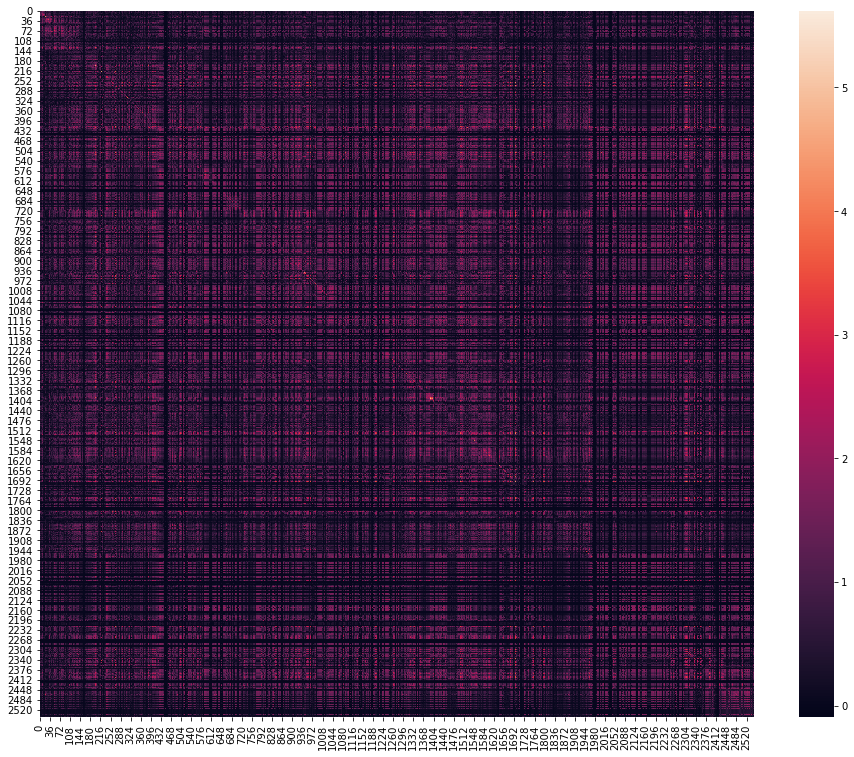

In [40]:
plt.figure(figsize=(16,13))
sns.heatmap(data=coEvoExcelData)
plt.show()

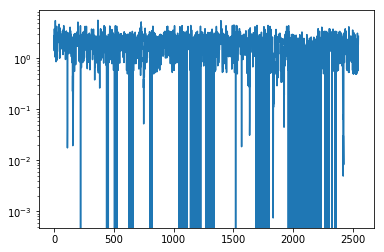

In [47]:
sns.lineplot(data=np.diag(np.matrix(coEvoExcelData)))
plt.yscale('log')
plt.show()

In [49]:
corrMatDir='/'.join([dataDir,'simulation_network_matrices'])

matChunkFileList=[matFile for matFile in os.listdir(corrMatDir) if 'window' in matFile]
windows=np.unique([matFile.split('.')[0] for matFile in matChunkFileList])
print matChunkFileList
print windows

['window_03.g_corr.pearson.ah', 'window_03.g_corr.pearson.aa', 'window_03.g_corr.pearson.af', 'window_03.g_corr.pearson.ag', 'window_03.g_corr.pearson.ai', 'window_02.g_corr.pearson.ah', 'window_02.g_corr.pearson.aa', 'window_02.g_corr.pearson.af', 'window_02.g_corr.pearson.ag', 'window_02.g_corr.pearson.ai', 'window_01.g_corr.pearson.ah', 'window_04.g_corr.pearson.ag', 'window_01.g_corr.pearson.aa', 'window_04.g_corr.pearson.ai', 'window_01.g_corr.pearson.af', 'window_04.g_corr.pearson.ah', 'window_01.g_corr.pearson.ag', 'window_01.g_corr.pearson.ai', 'window_04.g_corr.pearson.af', 'window_04.g_corr.pearson.aa', 'window_00.g_corr.pearson.ah', 'window_05.g_corr.pearson.ag', 'window_00.g_corr.pearson.aa', 'window_05.g_corr.pearson.ai', 'window_00.g_corr.pearson.af', 'window_05.g_corr.pearson.ah', 'window_00.g_corr.pearson.ag', 'window_00.g_corr.pearson.ai', 'window_05.g_corr.pearson.af', 'window_05.g_corr.pearson.aa', 'window_03.g_corr.pearson.ae', 'window_03.g_corr.pearson.ab', 'window

In [68]:
corrMatDir='/'.join([dataDir,'simulation_network_matrices'])

matType='g_corr.pearson'
startChunk='aa'

def parseTokens(tokens,fun=float):
    for x in tokens:
        try:
            yield float(x)
        except ValueError:
            pass

matrixDict={}
        
for window in windows:
    windowChunks=np.sort([matChunk for matChunk in matChunkFileList \
                  if (window in matChunk) & (matType in matChunk)])
    print '%s %s matrix file chunk list: '%(window,matType),
    print windowChunks
    
    matrixDataChunks=[]
    
    iCol=0
    iRow=0
    nRows=0
    nCols=0
    print 'Reading in matrix file chunks'
    for windowChunk in tqdm.tqdm_notebook(windowChunks):
        chunkFilePath='/'.join([corrMatDir,windowChunk])
        with open(chunkFilePath,'r') as chunkFile:
            corrMatDir='/'.join([dataDir,'simulation_network_matrices'])
            line=chunkFile.readline()
            
            if 'aa' in windowChunk:
                tokens=np.array(list(parseTokens(line.split())))
                nRows=int(tokens[0])
                nCols=int(tokens[1])
                matrixDataChunks.append(tokens[2:])
                line=chunkFile.readline()
            while line:
                tokens=np.array(list(parseTokens(line.split())))
                matrixDataChunks.append(tokens)
                line=chunkFile.readline()
    print 'converting to numpy matrix format'
    matrixData={'nRows':nRows,'nCols':nCols,'entries':np.concatenate(matrixDataChunks)}
    matrixDict[window]=correlation_data_utilities.corrDataDictToMat(matrixData)
    print '--- --- ---'

print 'Done'
print matrixDict

window_00 g_corr.pearson matrix file chunk list:  ['window_00.g_corr.pearson.aa' 'window_00.g_corr.pearson.ab'
 'window_00.g_corr.pearson.ac' 'window_00.g_corr.pearson.ad'
 'window_00.g_corr.pearson.ae' 'window_00.g_corr.pearson.af'
 'window_00.g_corr.pearson.ag' 'window_00.g_corr.pearson.ah'
 'window_00.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
window_01 g_corr.pearson matrix file chunk list:  ['window_01.g_corr.pearson.aa' 'window_01.g_corr.pearson.ab'
 'window_01.g_corr.pearson.ac' 'window_01.g_corr.pearson.ad'
 'window_01.g_corr.pearson.ae' 'window_01.g_corr.pearson.af'
 'window_01.g_corr.pearson.ag' 'window_01.g_corr.pearson.ah'
 'window_01.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
window_02 g_corr.pearson matrix file chunk list:  ['window_02.g_corr.pearson.aa' 'window_02.g_corr.pearson.ab'
 'window_02.g_corr.pearson.ac' 'window_02.g_corr.pearson.ad'
 'window_02.g_corr.pearson.ae' 'window_02.g_corr.pearson.af'
 'window_02.g_corr.pearson.ag' 'window_02.g_corr.pearson.ah'
 'window_02.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
window_03 g_corr.pearson matrix file chunk list:  ['window_03.g_corr.pearson.aa' 'window_03.g_corr.pearson.ab'
 'window_03.g_corr.pearson.ac' 'window_03.g_corr.pearson.ad'
 'window_03.g_corr.pearson.ae' 'window_03.g_corr.pearson.af'
 'window_03.g_corr.pearson.ag' 'window_03.g_corr.pearson.ah'
 'window_03.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
window_04 g_corr.pearson matrix file chunk list:  ['window_04.g_corr.pearson.aa' 'window_04.g_corr.pearson.ab'
 'window_04.g_corr.pearson.ac' 'window_04.g_corr.pearson.ad'
 'window_04.g_corr.pearson.ae' 'window_04.g_corr.pearson.af'
 'window_04.g_corr.pearson.ag' 'window_04.g_corr.pearson.ah'
 'window_04.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
window_05 g_corr.pearson matrix file chunk list:  ['window_05.g_corr.pearson.aa' 'window_05.g_corr.pearson.ab'
 'window_05.g_corr.pearson.ac' 'window_05.g_corr.pearson.ad'
 'window_05.g_corr.pearson.ae' 'window_05.g_corr.pearson.af'
 'window_05.g_corr.pearson.ag' 'window_05.g_corr.pearson.ah'
 'window_05.g_corr.pearson.ai']
Reading in matrix file chunks



converting to numpy matrix format
Done
{'window_02': matrix([[1.      , 0.954036, 0.929031, ..., 0.413307, 0.441715, 0.381947],
        [0.954036, 1.      , 0.974003, ..., 0.375102, 0.405039, 0.345884],
        [0.929031, 0.974003, 1.      , ..., 0.293402, 0.328828, 0.31239 ],
        ...,
        [0.413307, 0.375102, 0.293402, ..., 1.      , 0.950909, 0.775824],
        [0.441715, 0.405039, 0.328828, ..., 0.950909, 1.      , 0.861207],
        [0.381947, 0.345884, 0.31239 , ..., 0.775824, 0.861207, 1.      ]]), 'window_03': matrix([[1.      , 0.990232, 0.971338, ..., 0.38595 , 0.344828, 0.327539],
        [0.990232, 1.      , 0.988133, ..., 0.373817, 0.339276, 0.328034],
        [0.971338, 0.988133, 1.      , ..., 0.393533, 0.346449, 0.329839],
        ...,
        [0.38595 , 0.373817, 0.393533, ..., 1.      , 0.884689, 0.706315],
        [0.344828, 0.339276, 0.346449, ..., 0.884689, 1.      , 0.901769],
        [0.327539, 0.328034, 0.329839, ..., 0.706315, 0.901769, 1.      ]]), 'wi

generating heat map plots


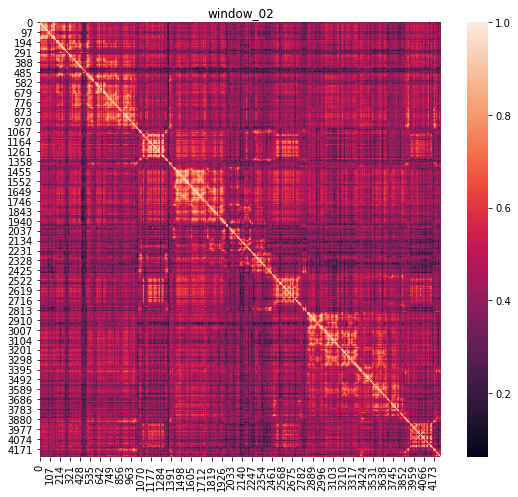

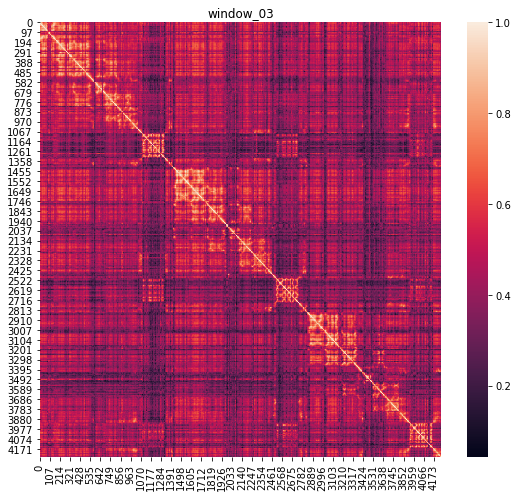

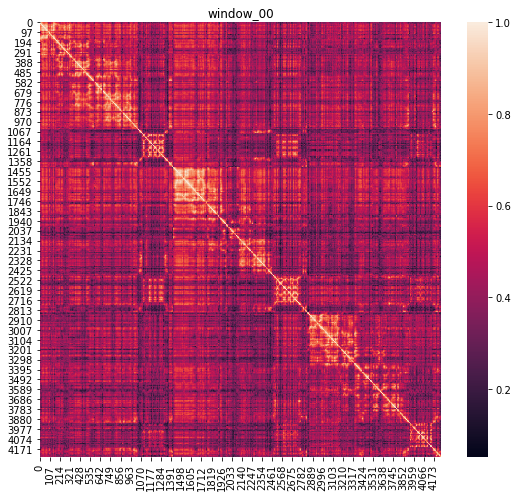

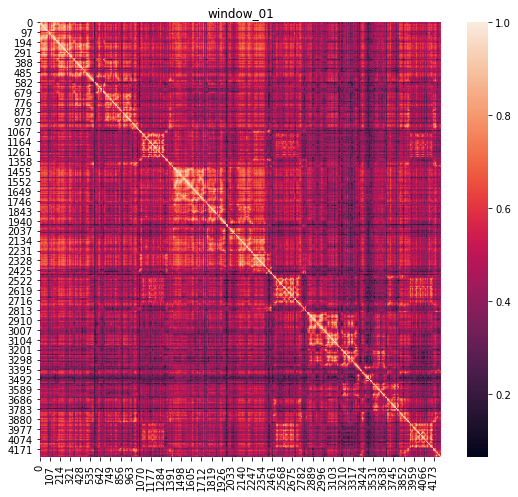

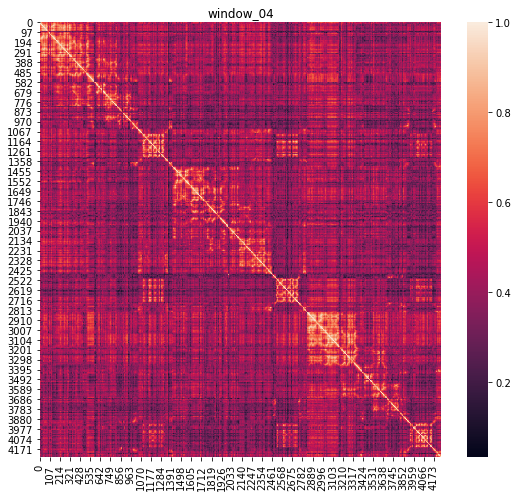

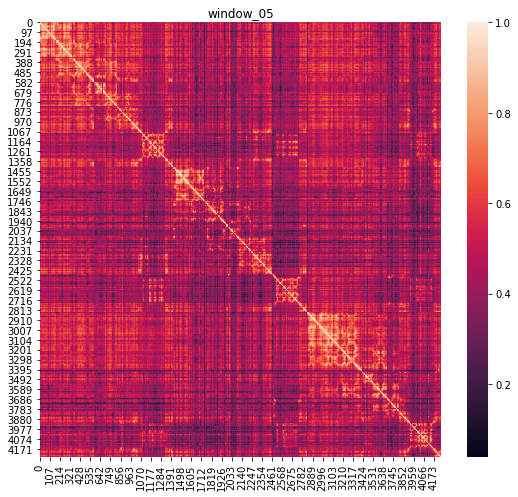

In [69]:
print 'generating heat map plots'
for matrixEntry in tqdm.tqdm_notebook(matrixDict):
    plt.figure(figsize=(9,8))
    sns.heatmap(data=matrixDict[matrixEntry])
    plt.title(matrixEntry)
    plt.show()